### Import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

### Create Data

In [15]:
trans_matrix = np.random.random((3,3))
trans_matrix = trans_matrix / np.sum(trans_matrix)
start = np.random.randint(3)

0

### Differentiate

In [38]:
data["gold_price_change"] = data["gold_price_usd"].diff()
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

### Plot

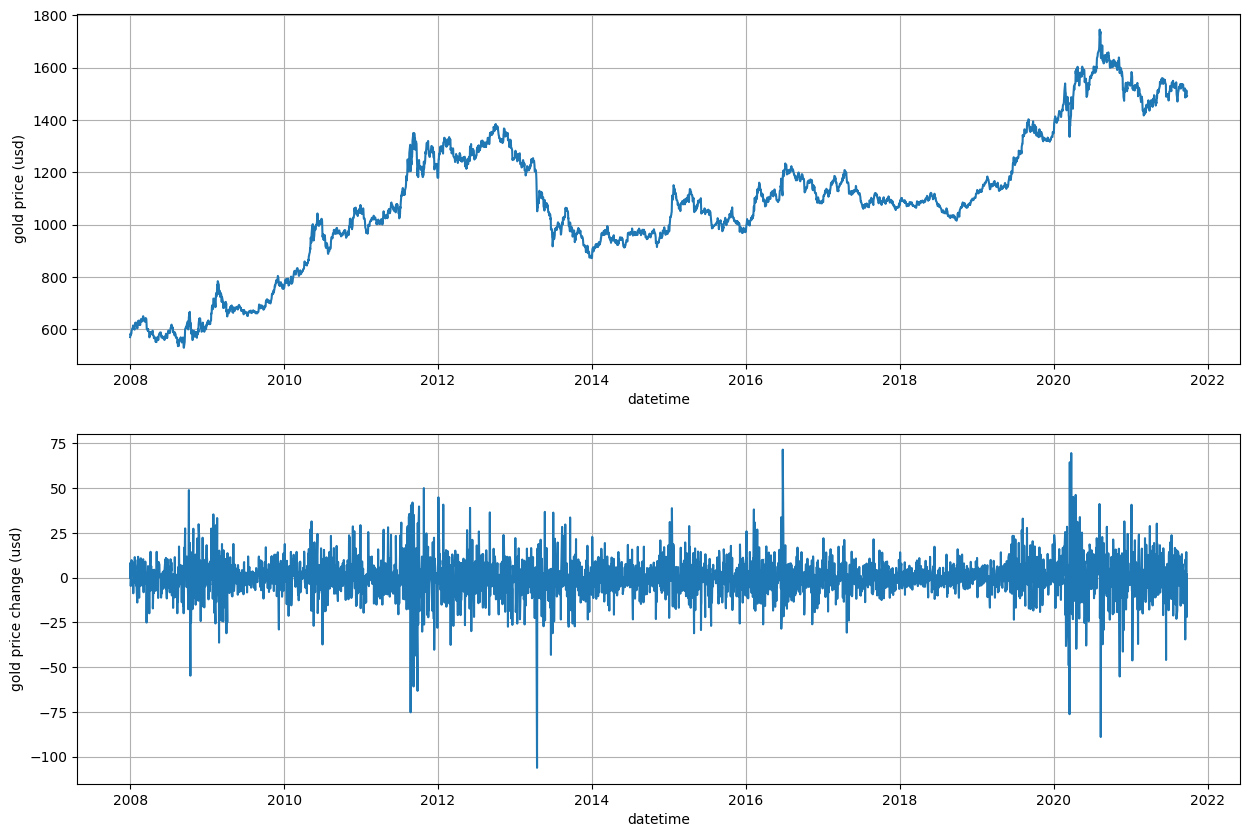

In [39]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()

### Hidden Markov Models

In [50]:
X = data[["gold_price_change"]]
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
Z = model.predict(X)
states = pd.unique(Z)
print(states)

[1 0 2]


### Probabilities

In [51]:
print("Start probabilities")
print(model.startprob_);

Start probabilities
[9.00876474e-03 9.90991235e-01 1.90652535e-52]


In [6]:
print("Transition matrix")
print(model.transmat_);
print(np.sum(model.transmat_))
plt.imshow(model.transmat_);

Transition matrix


NameError: name 'model' is not defined

In [53]:
print("Gaussian distribution means")
print(model.means_)
print("Gaussian distribution covariances")
print(model.covars_)

Gaussian distribution means
[[0.27897404]
 [0.20658205]
 [0.30620104]]
Gaussian distribution covariances
[[[ 28.11246244]]

 [[ 77.18151421]]

 [[324.43713708]]]


### Plot States

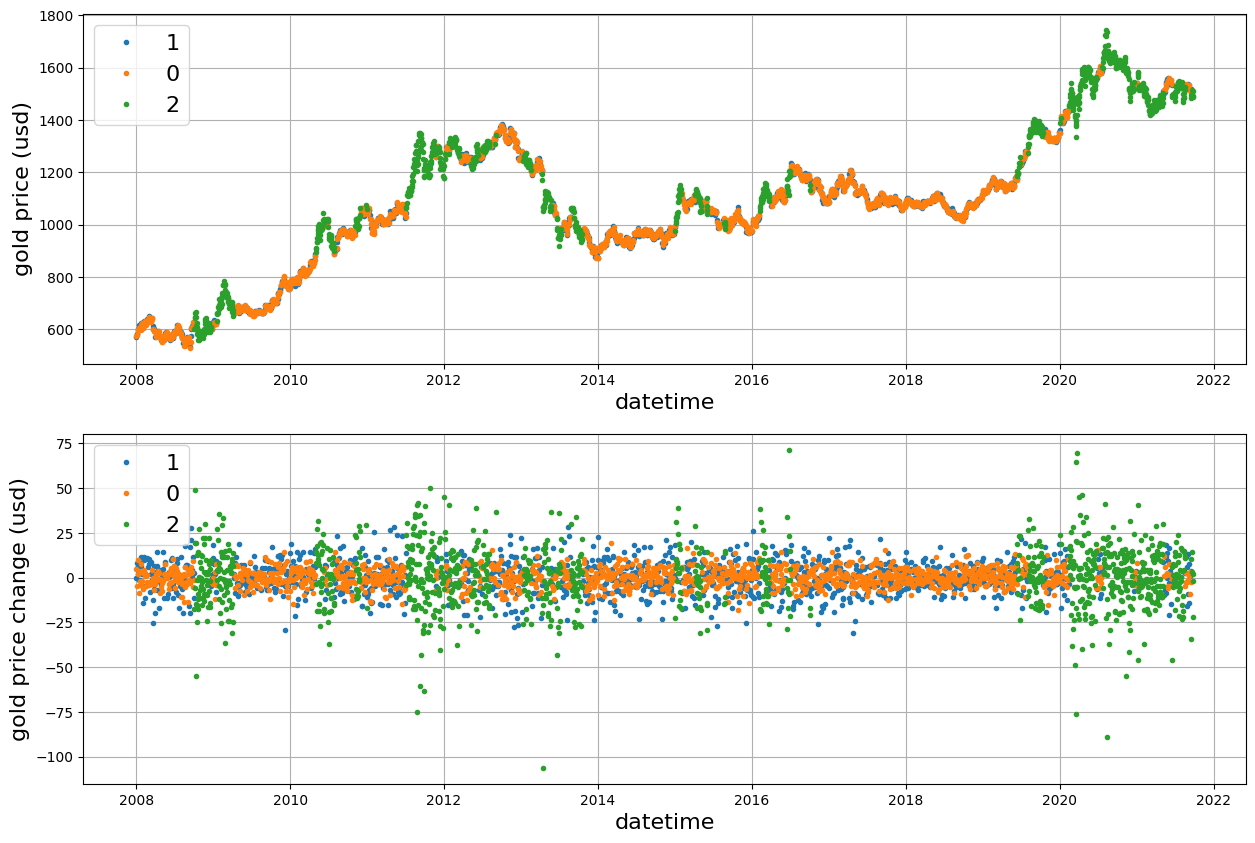

In [54]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()